# Fitting `UniLasso` for specified regularization path

In [1]:
from unilasso import *

## Basic Workflow

First, simulate some data from the Gaussian family.

In [2]:
X, y = simulate_gaussian_data(n=100, p=20)

Run `unilasso` using default lambda path and plot the coefficient path.

100%|          | 0/100 [00:00:00<?, ?it/s]██████████| 100/100 [00:00:00<00:00:00, 82290.44it/s] [dev:64.2%]██████████| 100/100 [00:00:00<00:00:00, 28254.91it/s] [dev:64.2%]


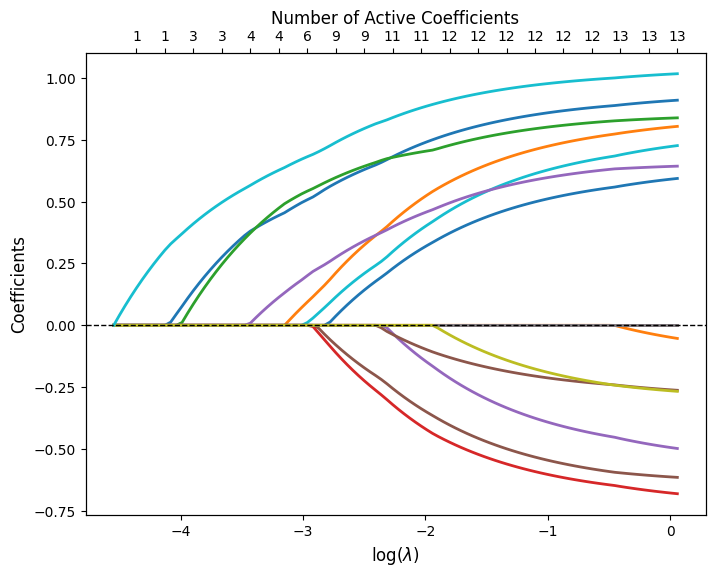

In [3]:
# lmdas = None means that the function will choose the best lambda for you
gaussian_fit = fit_unilasso(X, y, family='gaussian', lmdas = None) 
plot(gaussian_fit)

Run cross validation and plot the CV curve.

100%|          | 0/100 [00:00:00<?, ?it/s]██████████| 100/100 [00:00:00<00:00:00, 86658.19it/s] [dev:64.1%]██████████| 100/100 [00:00:00<00:00:00, 29732.04it/s] [dev:64.1%]


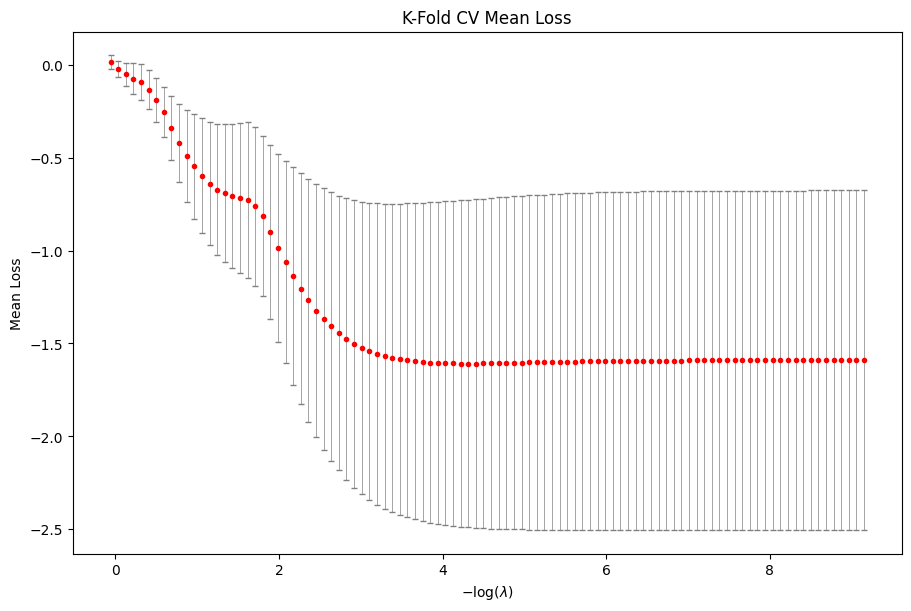

In [4]:
cv_fit = cv_unilasso(X, y, family='gaussian')
plot_cv(cv_fit)
extracted_fit = extract_cv(cv_fit)

Predict using the cv result on new dataset.

In [5]:
X_test, y_test = simulate_gaussian_data(n=100, p=20)
test_fit = predict(extracted_fit, X_test)
print(test_fit)

[ 9.84091869e-01 -4.75619241e-01 -1.23642788e-01 -1.13864683e+00
 -2.02405530e-01  1.49823118e+00  4.91804233e-01  4.29564032e-01
  2.74408880e+00  1.93737731e+00 -1.91858761e+00  1.62592669e-01
  2.05376929e+00  1.20628948e+00  3.86206266e-01 -1.75333502e+00
  7.01717860e-02  1.32320527e-01  3.94773515e-01  4.83964159e-01
  3.95071970e-01  2.55139903e-01  7.62983048e-01  1.50490868e+00
  2.10455371e+00  1.61970172e+00  5.69739141e-01 -7.90493529e-01
 -7.45736061e-02 -1.20251095e+00  1.47331121e+00  7.97649000e-01
  1.90239610e+00  2.84948436e-01  1.40513238e+00  7.38965131e-01
 -9.57082406e-01  1.25681126e+00  6.63350970e-01 -2.48420844e+00
  1.52718785e+00 -2.79866489e+00  1.19963490e+00  1.64343981e+00
  6.43062554e-01  1.34824699e+00 -1.14763168e+00  4.85575641e-01
 -9.75298713e-01  2.56305106e+00  3.62455229e-01  1.61577582e-01
  1.86867964e+00 -8.07625245e-01 -1.68770629e+00  7.84079389e-01
 -1.09296212e+00  8.87891766e-01 -2.35308101e-03  1.61560239e+00
  2.84114476e+00  6.22902

## Linear Regression Example

Let's first simulate some data using the included simulation script provided by the package.

Then we fit UniLasso for specified regularization path, `0.01, 0.02, 0.1, 0.2` (ordering does not matter).

In [6]:
X, y = simulate_gaussian_data(n=1000, p=100)
gaussian_fit = fit_unilasso(X, 
                            y, 
                            family = 'gaussian',
                            lmdas = [0.01, 0.02, 0.1, 0.2, 0.3, 1.0] # Regularization parameters for Lasso
                            )

 83%|          | 0/6 [00:00:00<?, ?it/s]████████  | 5/6 [00:00:00<00:00:00, 192.50it/s] [dev:94.6%]


We should print out the regularization path to see for which parameters the `UniLasso` model was run.

In [7]:
print(gaussian_fit.lmdas)

[0.02 0.1  0.2  0.3  1.  ]


Now, we can extract the returned coefficients and intercepts and print their shapes.

In [8]:
coefs, intercept = gaussian_fit.coefs, gaussian_fit.intercept

print(coefs.shape)
print(intercept.shape)

(5, 100)
(5,)


`coefs[0, :]` correpsonds to the coefficients for $\lambda = 0.02$.

In [9]:
coefs[0, ]

array([ 0.        , -0.7664509 ,  0.95511933, -0.20235622,  0.93215634,
       -0.57377096, -0.21067063, -0.29282863, -1.13353951,  0.        ,
        0.22321527, -0.98893139,  0.        , -0.        ,  0.18878941,
       -0.87944839,  0.73461774,  0.42040693,  0.78727158, -0.54580597,
       -0.        , -0.6032875 ,  0.6782694 , -0.5073521 , -0.2050956 ,
       -0.48567543,  0.04326961,  0.41500191,  1.13383679, -0.        ,
       -0.        , -0.57443687, -0.6901873 , -0.70982198, -0.28262777,
       -0.        ,  0.        , -0.59368295, -0.        ,  0.        ,
       -0.8369917 ,  0.22788292, -0.45282654, -0.54356499, -0.        ,
        0.86122935, -0.59083284,  1.00496799,  0.44635664,  0.76569495,
       -0.72140231, -0.442096  ,  0.8668627 , -0.71954609, -0.81884407,
        0.74704466,  0.13108133,  0.40785448, -0.50731535, -0.11675062,
       -0.2113159 , -0.43381143,  0.80424459, -0.92715716,  0.85976677,
       -0.        , -1.09938953, -0.71782056, -0.51068184,  0.  

### Predict on new data

To get predictions, we call `predict`:

In [36]:
y_hat = predict(gaussian_fit, X)
print(y_hat.shape)

(1000, 6)


We can also call `predict` for a specific index of $\lambda$:

In [ ]:
y_hat_lmda_1 = predict(X, gaussian_fit, lmda_idx = 1)
print(y_hat_lmda_1.shape)

(1000,)


### One regularization parameter

We can also input only one regularization parameter:

In [ ]:
gaussian_fit_one_lmda = fit_unilasso(X, y, family = 'gaussian', lmdas = 0.2, verbose = True)

100%|          | 0/1 [00:00:00<?, ?it/s]██████████| 1/1 [00:00:00<00:00:00, 115.01it/s] [dev:66.6%]██████████| 1/1 [00:00:00<00:00:00, 53.09it/s] [dev:66.6%] 


Number of Selected Features: 51
Regularization path (rounded to 3 decimal places): [0.2]


### Using default regularization path

In [11]:
gaussian_fit_one_lmda = fit_unilasso(X, y, family = 'gaussian', lmdas = None, verbose = True)

 74%|          | 0/100 [00:00:00<?, ?it/s]███████   | 74/100 [00:00:00<00:00:00, 9450.88it/s] [dev:90.1%]


Number of Selected Features: [75 75 74 74 73 72 72 71 71 71 69 68 68 65 63 63 63 62 61 60 59 58 57 57
 57 55 55 53 52 51 49 47 45 44 42 41 38 37 36 35 33 31 31 25 20 19 17 16
 16 16 13 13 12 12 12 10 10  9  9  7  7  7  7  7  5  4  2  2  2  1  1  1
  1  0]
Regularization path (rounded to 3 decimal places): [1.759 1.679 1.603 1.53  1.461 1.394 1.331 1.27  1.213 1.157 1.105 1.055
 1.007 0.961 0.917 0.876 0.836 0.798 0.762 0.727 0.694 0.662 0.632 0.604
 0.576 0.55  0.525 0.501 0.478 0.457 0.436 0.416 0.397 0.379 0.362 0.345
 0.33  0.315 0.3   0.287 0.274 0.261 0.249 0.238 0.227 0.217 0.207 0.198
 0.189 0.18  0.172 0.164 0.157 0.149 0.143 0.136 0.13  0.124 0.118 0.113
 0.108 0.103 0.098 0.094 0.09  0.086 0.082 0.078 0.074 0.071 0.068 0.065
 0.062 0.059]


### Plot coefficient path

100%|          | 0/6 [00:00:00<?, ?it/s]██████████| 6/6 [00:00:00<00:00:00, 354.71it/s] [dev:67.6%]██████████| 6/6 [00:00:00<00:00:00, 105.55it/s] [dev:67.6%]


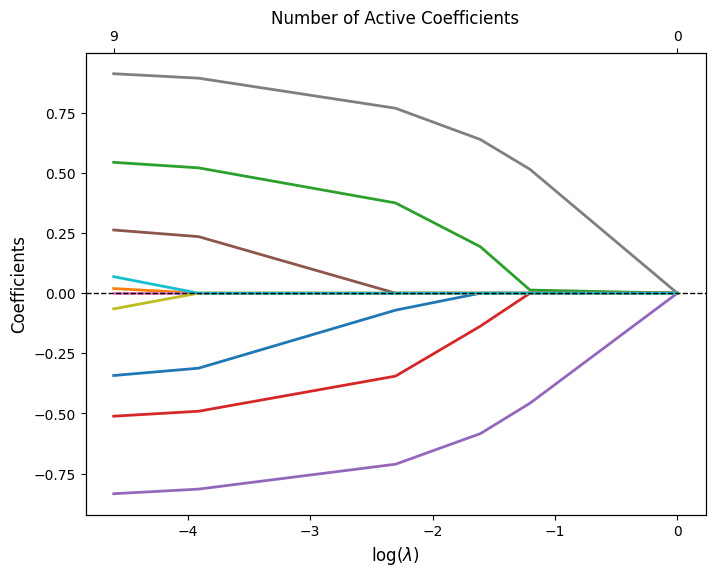

In [12]:
X, y = simulate_gaussian_data(n=1000, p=10)
gaussian_fit = fit_unilasso(X, 
                            y, 
                            family = 'gaussian',
                            lmdas = [0.01, 0.02, 0.1, 0.2, 0.3, 1.0] # Regularization parameters for Lasso
                            )
plot(gaussian_fit)

## Logistic Regression Example

Now we run an example logistic regression model using `UniLasso`. We set `verbose = True` to print out some summary information of the model.

In [13]:
X, y = simulate_binomial_data(n=1000, p=10)

binomial_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 1984.50it/s] [dev:26.0%]██████████| 4/4 [00:00:00<00:00:00, 414.20it/s] [dev:26.0%] 


Number of Selected Features: [7 5 0 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


In [14]:
binomial_fit.lmdas

array([0.01, 0.02, 0.1 , 0.2 ])

## Survival Analysis Example

In [15]:
X, y = simulate_cox_data(n=1000, p=10)

cox_fit = fit_unilasso(X,
                       y,
                       family = 'cox',
                       lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                       verbose = True
                       )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 2192.18it/s] [dev:12.7%]██████████| 4/4 [00:00:00<00:00:00, 802.01it/s] [dev:12.7%] 


Number of Selected Features: [9 9 3 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


# Cross-validated `UniLasso`

If we don't have a prespecified list of regularization path or regularization parameter, we can perform cross-validation to select a penalization parameter for us. We again begin by simulating some Gaussian data.

In [31]:
X, y = simulate_gaussian_data(n=1000, p=10)

100%|          | 0/100 [00:00:00<?, ?it/s]██████████| 100/100 [00:00:00<00:00:00, 59241.71it/s] [dev:53.9%]██████████| 100/100 [00:00:00<00:00:00, 26779.73it/s] [dev:53.9%]


Number of Selected Features: [0 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 6 6 6 6 6 6 6 6
 6 6 6 6 6 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
Regularization path (rounded to 3 decimal places): [0.472 0.43  0.392 0.357 0.325 0.296 0.27  0.246 0.224 0.204 0.186 0.17
 0.155 0.141 0.128 0.117 0.107 0.097 0.088 0.081 0.073 0.067 0.061 0.056
 0.051 0.046 0.042 0.038 0.035 0.032 0.029 0.026 0.024 0.022 0.02  0.018
 0.017 0.015 0.014 0.013 0.011 0.01  0.009 0.009 0.008 0.007 0.007 0.006
 0.005 0.005 0.005 0.004 0.004 0.003 0.003 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Best Regularization Parameter: 4.720161796842871e-05


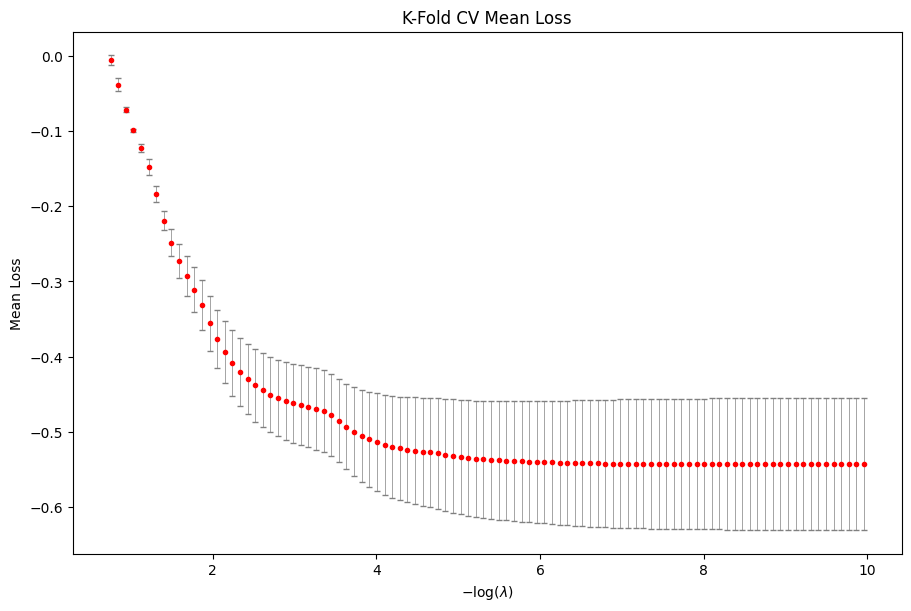

In [32]:
cv_fit = cv_unilasso(X,
                     y,
                     family = 'gaussian',
                     verbose = True
                     )

Now, we can extract the best $\lambda$.

In [33]:
best_lmda = cv_fit.best_lmda
print(best_lmda)

4.720161796842871e-05


We can also extract the coefficients and intercept corresponding to the best model as follows:

In [34]:
extracted_fit = extract_cv(cv_fit)

print("Best coefficients and intercepts:")
print('\n-------------------\n')
print(extracted_fit.coefs)
print('\n-------------------\n')
print(extracted_fit.intercept)

Best coefficients and intercepts:

-------------------

[-0.13018152 -0.07608233 -0.44708621 -0.21069261 -0.18733096  0.07067549
 -0.59252164 -0.          0.74471823 -0.21886871]

-------------------

0.010395866389325492


In [35]:
predict(extracted_fit, X)

array([-1.29251020e+00, -3.01014249e-01, -6.28286241e-01, -2.21375308e+00,
        4.15244828e-01,  1.05132100e+00, -1.26788498e+00,  4.26135234e-01,
        2.71209011e-01,  1.02868783e+00, -1.38447633e+00,  1.01111651e+00,
       -2.15983838e+00, -5.58453383e-01,  7.39340711e-01, -2.74185422e-01,
        2.98829849e-01,  2.23892189e+00, -3.17426776e-02, -3.51035968e+00,
        7.43192300e-01, -1.05468560e+00, -2.84072871e-01,  6.21132275e-01,
       -8.18340461e-01, -2.58282056e+00,  1.44673281e+00,  9.31466123e-01,
       -2.89348761e+00,  1.54132631e+00,  4.14797185e-01,  8.73897491e-01,
        2.96971507e-01, -1.37354486e+00, -9.36984504e-01, -1.59271628e+00,
        1.03089814e+00, -2.87570587e+00,  8.93747857e-01,  7.98541613e-01,
        7.24791737e-01, -1.29561339e+00,  2.54522699e-01,  1.31127964e+00,
        1.06704006e+00, -1.21995777e+00,  1.78334154e+00,  1.09298388e+00,
       -7.14411817e-01,  8.53090229e-01,  2.32128962e-01, -7.80076708e-01,
       -3.38677642e-01,  

Let's visualize the average CV loss.

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'K-Fold CV Mean Loss'}, xlabel='$-\\log(\\lambda)$', ylabel='Mean Loss'>)

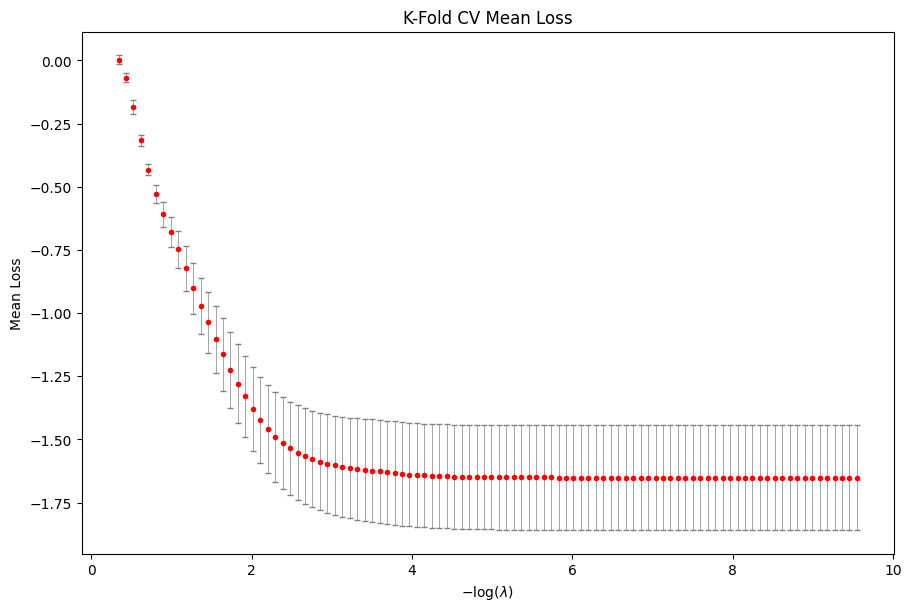

In [21]:
cv_fit.cv_plot()

## Features with zero variance will be removed automatically

If any column of our input data has zero variance, it will be removed by default.

In [22]:
X, y = simulate_binomial_data(n=1000, p=10)

# Make the first column zero variance
X[:, 0] = 1
zero_var_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], 
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 3098.77it/s] [dev:23.9%]██████████| 4/4 [00:00:00<00:00:00, 327.27it/s] [dev:23.9%] 


Number of Selected Features: [8 7 0 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


Note that the corresponding coefficient for the first column is 0 across regularization parameters.

In [24]:
print(zero_var_fit.coefs[:, 0])

[0. 0. 0. 0.]
